<a href="https://colab.research.google.com/github/Tarsha777/Prodigy/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = {
    'Text': [
        "I love this product!",
        "This is the worst experience ever.",
        "It's okay, nothing special.",
        "Amazing service!",
        "Not happy with the purchase."
    ],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
}

sentiment_data = pd.DataFrame(data)

In [3]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [4]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

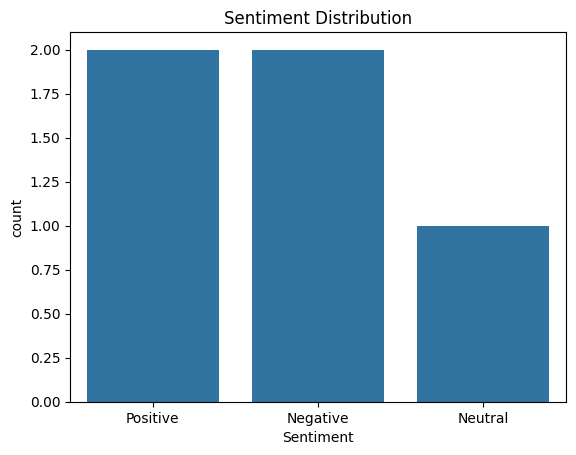

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sentiment distribution
sns.countplot(x='Sentiment', data=sentiment_data)
plt.title('Sentiment Distribution')
plt.show()

In [6]:
positive_texts = ' '.join(sentiment_data[sentiment_data['Sentiment'] == 'Positive']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

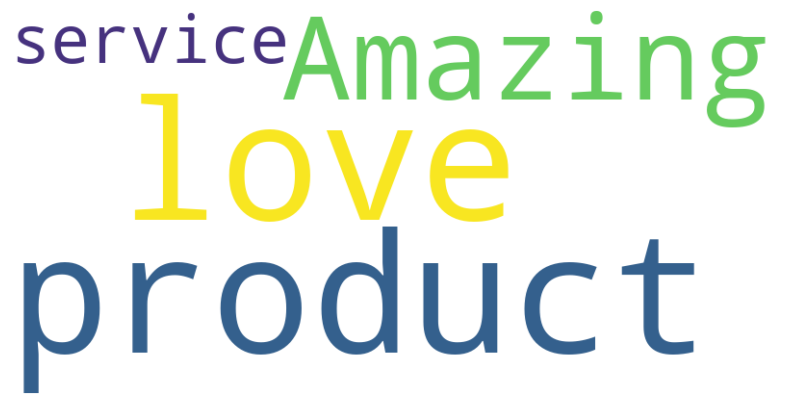

In [7]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()